# 📘 California Housing Price Prediction Exercise
Welcome! I have attached my boston housing ML exercise project in the previous jupyter notebook. This is my alternative assignment of bostorn housing ML exercise project based on californial housing dataset since the boston dataset is deprecated in the newer versions of sklearn after version 1.2 of scikit‑learn because of ethical concerns regarding one of its features, which relates to racial demographics. Hence Boston dataset can not be runned in the latest version of python (after 3.10) due to compatibility issues.

In [ ]:
# Step 1: Load the dataset
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target, name='PRICE')

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [2]:
# Step 2: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Step 3: Fit a Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
# Calculate RMSE manually by taking the square root of MSE
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
print("Linear Regression RMSE:", rmse)
print("Linear Regression R²:", r2_score(y_test, y_pred_lr))

Linear Regression RMSE: 0.7455813830127761
Linear Regression R²: 0.5757877060324511


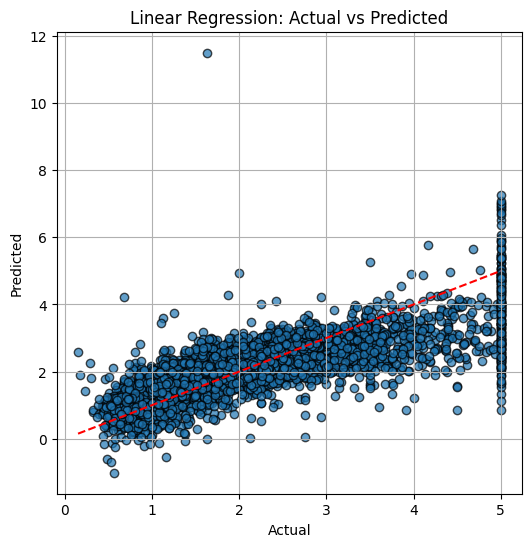

In [4]:
# Step 4: Plot predicted vs actual
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.grid(True)
plt.show()

In [5]:
# Step 5: Add Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)
# Calculate RMSE manually by taking the square root of MSE
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print("Random Forest RMSE:", rmse_rf)
print("Random Forest R²:", r2_score(y_test, y_pred_rf))

Random Forest RMSE: 0.5053399773665033
Random Forest R²: 0.8051230593157366


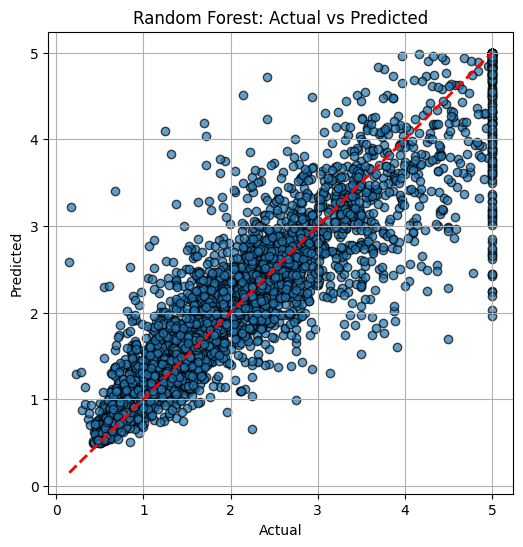

In [6]:
# Step 6: Plot for Random Forest
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, edgecolor='k', alpha=0.7, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest: Actual vs Predicted')
plt.grid(True)
plt.show()

## ⚖️Model Comparison (California Housing Dataset)
- **Linear Regression**  
  RMSE: 0.7455813830127761  
  R²: 0.5757877060324511  

- **Random Forest**  
  RMSE: 0.5053399773665033  
  R²: 0.8051230593157366  

**Conclusion:** 
The accuracy of the output results are considered good if:
- RMSE has a lower value,
- R² has a higher value.

Hence, the Random Forest model outperforms Linear Regression with a lower RMSE and higher R², indicating better predictive accuracy.